In [0]:
%tensorflow_version 1.x
from keras.models import Sequential
from keras import layers
from keras.preprocessing.text import Tokenizer
import pandas as pd
from sklearn import preprocessing
from sklearn.model_selection import train_test_split

In [32]:
df = pd.read_csv('imdb_master.csv',encoding='latin-1')
print(df.head())
sentences = df['review'].values
pureSentences = sentences
y = df['label'].values

   Unnamed: 0  type  ... label         file
0           0  test  ...   neg      0_2.txt
1           1  test  ...   neg  10000_4.txt
2           2  test  ...   neg  10001_1.txt
3           3  test  ...   neg  10002_3.txt
4           4  test  ...   neg  10003_3.txt

[5 rows x 5 columns]


tokenizing data

In [0]:
tokenizer = Tokenizer(num_words=2000)
tokenizer.fit_on_texts(sentences)

getting the vocabulary of data


In [0]:
sentences = tokenizer.texts_to_matrix(sentences)

In [35]:
import numpy as np
le = preprocessing.LabelEncoder()
y = le.fit_transform(y)
X_train, X_test, y_train, y_test = train_test_split(sentences, y, test_size=0.25, random_state=1000)
input_dim=np.prod(X_train.shape[1:])
print(input_dim)

2000


In [0]:
model = Sequential()




In [37]:
model.add(layers.Dense(300, activation='relu',input_dim=input_dim))
model.add(layers.Dense(3, activation='softmax'))
model.compile(loss='sparse_categorical_crossentropy',optimizer='adam',metrics=['acc'])
history=model.fit(X_train,y_train, epochs=5, verbose=True, validation_data=(X_test,y_test), batch_size=256)

Train on 75000 samples, validate on 25000 samples
Epoch 1/5
75000/75000 [==============================] - 5s 70us/step - loss: 0.8799 - acc: 0.5061 - val_loss: 0.8414 - val_acc: 0.5112
Epoch 2/5
75000/75000 [==============================] - 5s 65us/step - loss: 0.7895 - acc: 0.5759 - val_loss: 0.8410 - val_acc: 0.5138
Epoch 3/5
75000/75000 [==============================] - 5s 66us/step - loss: 0.6910 - acc: 0.6727 - val_loss: 0.8640 - val_acc: 0.5170
Epoch 4/5
75000/75000 [==============================] - 5s 66us/step - loss: 0.5077 - acc: 0.8076 - val_loss: 0.9472 - val_acc: 0.5066
Epoch 5/5
75000/75000 [==============================] - 5s 65us/step - loss: 0.3005 - acc: 0.9188 - val_loss: 1.0682 - val_acc: 0.5085


In [12]:
from keras.preprocessing.sequence import pad_sequences
max_review_len= max([len(s.split()) for s in pureSentences])
vocab_size= len(tokenizer.word_index)+1
sentencesPre = tokenizer.texts_to_sequences(pureSentences)
padded_docs= pad_sequences(sentencesPre,maxlen=max_review_len)
le = preprocessing.LabelEncoder()
y = le.fit_transform(y)
X_train, X_test, y_train, y_test = train_test_split(padded_docs, y, test_size=0.25, random_state=1000)
print(vocab_size)
print(max_review_len)


176408
2470


In [0]:
# from keras.layers import Embedding
# X_train.shape


In [0]:
from keras.layers import Embedding, Flatten
m = Sequential()
m.add(Embedding(vocab_size, 50, input_length=max_review_len))
m.add(Flatten())
m.add(layers.Dense(300, activation='relu',input_dim=max_review_len))
m.add(layers.Dense(3, activation='softmax'))
m.compile(loss='sparse_categorical_crossentropy',optimizer='adam',metrics=['acc'])

In [14]:
history1=m.fit(X_train,y_train, epochs=5, verbose=True, validation_data=(X_test,y_test), batch_size=256)

Train on 75000 samples, validate on 25000 samples
Epoch 1/5
75000/75000 [==============================] - 261s 3ms/step - loss: 0.9920 - acc: 0.4851 - val_loss: 0.8620 - val_acc: 0.4937
Epoch 2/5
75000/75000 [==============================] - 262s 3ms/step - loss: 0.7813 - acc: 0.5879 - val_loss: 0.8762 - val_acc: 0.4930
Epoch 3/5
75000/75000 [==============================] - 263s 4ms/step - loss: 0.6251 - acc: 0.7121 - val_loss: 1.0014 - val_acc: 0.4863
Epoch 4/5
75000/75000 [==============================] - 262s 3ms/step - loss: 0.4483 - acc: 0.8137 - val_loss: 1.2254 - val_acc: 0.4786
Epoch 5/5
75000/75000 [==============================] - 264s 4ms/step - loss: 0.3038 - acc: 0.8856 - val_loss: 1.4383 - val_acc: 0.4718


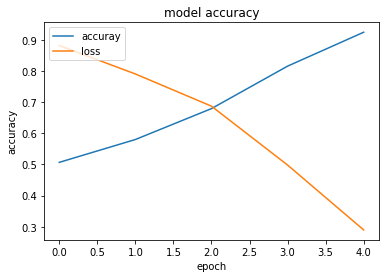

In [18]:
import matplotlib.pyplot as plt
plt.plot(history.history['acc'])
plt.plot(history.history['loss'])
# plt.plot(history.history['loss'])
# plt.plot(history.history['val_loss'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['accuray', 'loss'], loc='upper left')
plt.show()

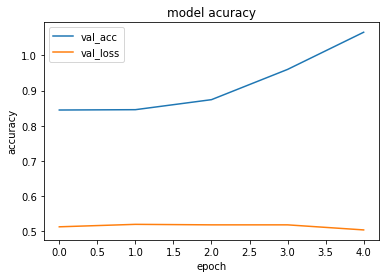

In [22]:
plt.plot(history.history['val_loss'])
plt.plot(history.history['val_acc'])
plt.title('model acuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['val_acc','val_loss'], loc='upper left')
plt.show()

In [23]:
from sklearn.datasets import fetch_20newsgroups
twenty_train = fetch_20newsgroups(subset='train', shuffle=True)


In [0]:
sentences= twenty_train.data
y=twenty_train.target

In [0]:
from keras.preprocessing.sequence import pad_sequences
max_review_len= max([len(s.split()) for s in sentences])
vocab_size= len(tokenizer.word_index)+1
sentencesPre = tokenizer.texts_to_sequences(sentences)
padded_docs= pad_sequences(sentencesPre,maxlen=max_review_len)
X_train, X_test, y_train, y_test = train_test_split(padded_docs, y, test_size=0.25, random_state=1000)


In [0]:
from keras.layers import Embedding, Flatten
n = Sequential()
n.add(Embedding(vocab_size, 50, input_length=max_review_len))
n.add(Flatten())
n.add(layers.Dense(300, activation='relu',input_dim=max_review_len))
n.add(layers.Dense(20, activation='softmax'))
n.compile(loss='sparse_categorical_crossentropy',optimizer='adam',metrics=['acc'])

In [29]:
h2=n.fit(X_train,y_train, epochs=5, verbose=True, validation_data=(X_test,y_test), batch_size=256)

Train on 8485 samples, validate on 2829 samples
Epoch 1/5
8485/8485 [==============================] - 141s 17ms/step - loss: 1.6181 - acc: 0.5741 - val_loss: 2.0611 - val_acc: 0.3443
Epoch 2/5
8485/8485 [==============================] - 141s 17ms/step - loss: 1.3179 - acc: 0.6770 - val_loss: 1.9741 - val_acc: 0.3606
Epoch 3/5
8485/8485 [==============================] - 143s 17ms/step - loss: 1.0721 - acc: 0.7566 - val_loss: 1.9186 - val_acc: 0.3871
Epoch 4/5
8485/8485 [==============================] - 141s 17ms/step - loss: 0.8966 - acc: 0.7962 - val_loss: 1.9022 - val_acc: 0.3906
Epoch 5/5
8485/8485 [==============================] - 140s 17ms/step - loss: 0.7360 - acc: 0.8486 - val_loss: 1.8600 - val_acc: 0.4016


In [0]:
x=model.predict_classes(X_test[[1],:])

In [43]:
print("Actual Prediction",y_test[1],"Predicted Prediction",x)

Actual Prediction 2 Predicted Prediction [2]


In [44]:
from time import time
from keras.callbacks import TensorBoard
tensorboard = TensorBoard(log_dir="/content/drive/My Drive/Colab Notebooks/logs/{}".format(time()))
model.fit(X_train,y_train,verbose=1,callbacks=[tensorboard], epochs=5)

Epoch 1/5
75000/75000 [==============================] - 17s 228us/step - loss: 0.0891 - acc: 0.9809
Epoch 2/5
75000/75000 [==============================] - 17s 226us/step - loss: 0.0818 - acc: 0.9818
Epoch 3/5
75000/75000 [==============================] - 18s 239us/step - loss: 0.0754 - acc: 0.9836
Epoch 4/5
75000/75000 [==============================] - 17s 229us/step - loss: 0.0695 - acc: 0.9850
Epoch 5/5
75000/75000 [==============================] - 17s 226us/step - loss: 0.0640 - acc: 0.9862


In [0]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
